# **Class Assignment: Multiple Linear Regression with Matrices (20 points)**

#### **Meg Bucich**


####<font color=red>Task 1</font>

The goal of this assignment is to code all aspects a multiple linear regression by hand (in R) using matrix form. We will also learn how to use the matrices to conduct statistical inference.

1. We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  Run the following command to view the `mtcars` dataset

    `head(mtcars)`

2. We are interested in investigating the relationship between quarter mile time `qsec` (seconds) as our response and horsepower `hp` and miles per gallon `mpg` as our two predictors.

  As always, we should plot our data before running our regressions!

  * Plot two scatterplots, one for each predictor on the x-axis and with `qsec` on the y-axis. For each predicto, what are your observations? Are the relationships linear? quadratic? Is there no relationship? Explain your answer in complete sentences.

In [1]:
#1
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


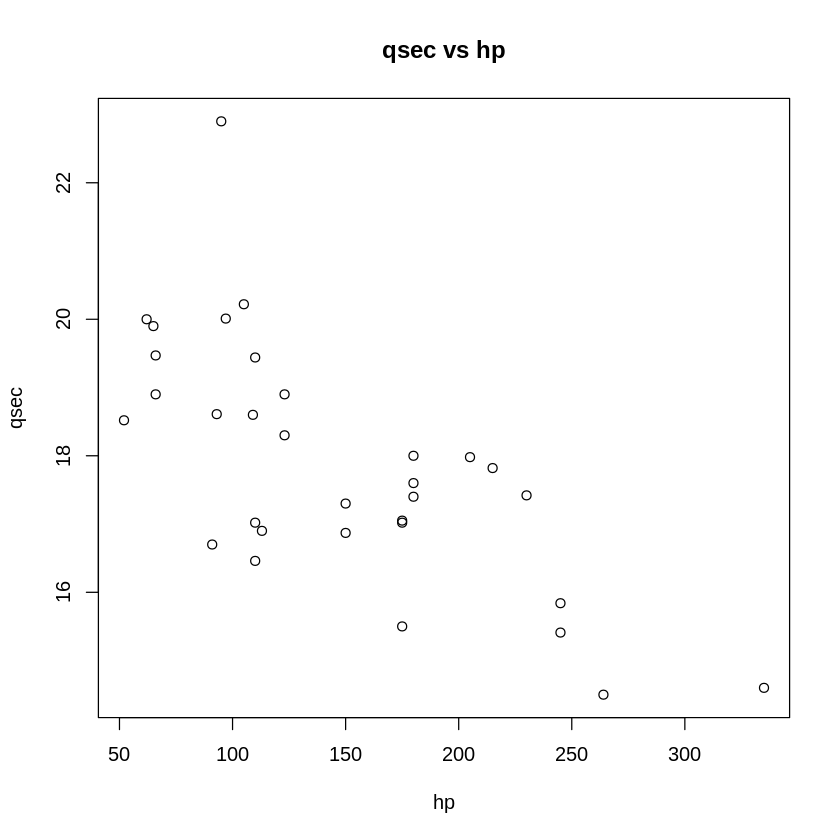

In [5]:
#2
qsec = mtcars$qsec #response, y
hp = mtcars$hp #predictor, x1
mpg = mtcars$mpg #predictor, x2

plot(hp,qsec, xlab = 'hp', ylab = 'qsec', main = 'qsec vs hp')


there seems to be a negative linear relationship between qsec and hp but we could also agrue that the relationship appears quadratic.

[1] 32

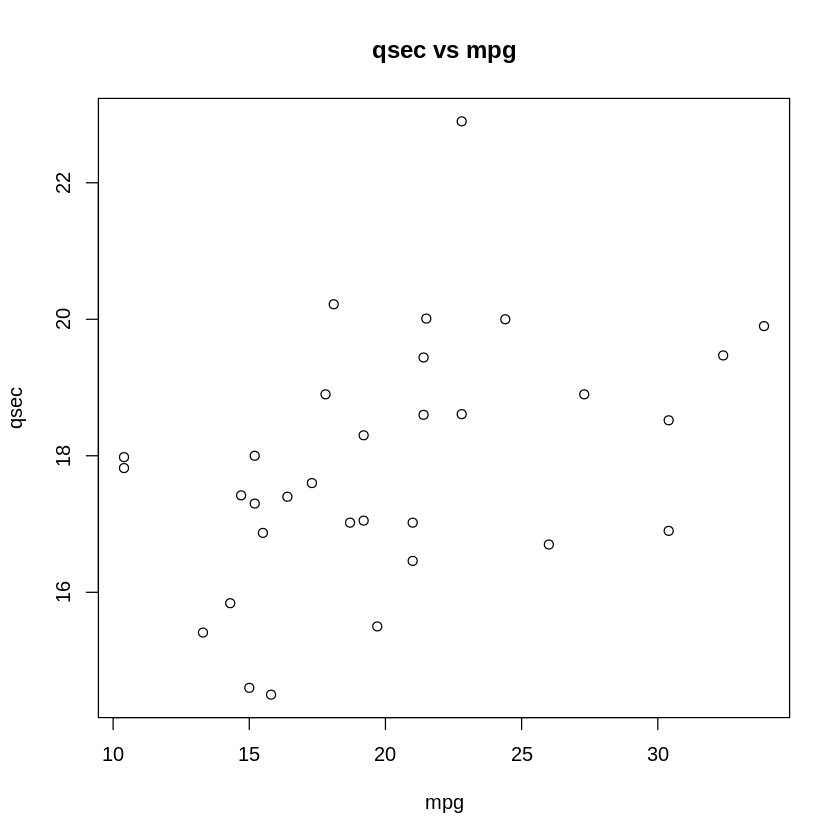

In [6]:
32
plot(mpg,qsec,xlab = 'mpg', ylab = 'qsec', main = 'qsec vs mpg')

there appears to be a weak relationship between qsec and mpg but i do see some correlation happening but it is not as strong as the hp relationship

####<font color=red>Task 2</font>

In this task, we will analyze a multiple linear regression model. Note that we are assuming that all of our error assumptions are correct. In a future lecture, we will learn how to check these error assumptions.

1. Fit a multiple linear regression model with `qsec` as the response and `hp` and `mpg` as predictors (see code below)
```
fit <- lm(qsec ~ hp + mpg, data = mtcars)
```
Summarize your regression using `summary()`.

2. Which variable(s) is/are significant in your multiple linear regression model? Why?

3. Which variable(s) is/are *not* significant in your multiple linear regression model? Why?

4. Interpret the slopes of both predictors. Do these slopes make sense in the context of quarter mile times of cars?

5. Remove any variables that are not significant and re-fit the model, store as `fit_final`. This will be our final model! [Note there are better ways to find the best model - future lecture]

In [7]:
#1
fit = lm(qsec ~ hp + mpg, data = mtcars)
summary(fit)


Call:
lm(formula = qsec ~ hp + mpg, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2217 -0.7223 -0.0861  0.7547  4.0173 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.497279   1.850030  12.701 2.25e-13 ***
hp          -0.025125   0.005179  -4.851 3.83e-05 ***
mpg         -0.097709   0.058916  -1.658    0.108    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.247 on 29 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5134 
F-statistic: 17.35 on 2 and 29 DF,  p-value: 1.108e-05


In [ ]:
#2 significant variables

the intecept and hp both have relatively small p-values which make them significant at the 95% level


In [ ]:
#3 insignificant variables

mpg has a p-value of .108 which is not significant at the 95% level

In [ ]:
#4

For every increase in mpg, qsec decreases by -.097709. This slope does not make sense based on how the variables looked plotted against each other.

For every increase in hp, qsec decreases by -.025125. This slope makes sense based on how the data looked when plotted.

In [8]:
#5
fit = lm(qsec ~ hp, data = mtcars)
summary(fit)


Call:
lm(formula = qsec ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06


<br>

---

<br>






####<font color=red>Task 3</font>

In this task, we will derive multiple linear regression estimates by hand (in R) using matrices.

1. In a text cell, write the matrix formulation of the multiple linear regression model.

2. Using R code, create the <u>model matrix</u> for the multiple linear regression and store as the variable `X`. Show the first 6 rows of this matrix.

  Hint: This is the matrix containing the intercept and two predictor variables as columns. The `cbind()` function may be helpful here.

3. Use the following matrix functions to calculate the parameter vector $\bf{\hat{\beta}} = (X^\prime X)^{-1}X^{\prime}Y$ and store as `betahat`.
```
t()        # matrix transpose
A %*% B    # matrix multiplication
solve()    # matrix inverse
```

4. Compare your answers to the slopes from your regression using `coef(fit)`.



In [ ]:
#1

$Y_{nx1} = X_{nxp}\beta_{px1} + \epsilon_{nx1}$

In [9]:
#2
X = cbind(1, mtcars$hp, mtcars$mpg)
head(X)

1,110,21.0
1,110,21.0
1,93,22.8
1,110,21.4
1,175,18.7
1,105,18.1


In [13]:
#3
Y = mtcars$qsec
betahat = solve(t(X)%*%X) %*%t(X)%*% Y
betahat

23.49727917
-0.02512482
-0.09770885


In [14]:
#4
fit = lm(qsec ~ hp + mpg, data = mtcars)
coef(fit)

(Intercept)          hp         mpg 
23.49727917 -0.02512482 -0.09770885

<br>

---

<br>






####<font color=red>Task 4</font>

1. Calculate $\widehat{Var({\hat{\beta}})} = s^2 (X'X)^{-1}$ and store as `betahat_var`.

2. Verify your answer with the standard errors of the parameters estimates from `fit`.

3. Is the variance-covariance matrix of $\hat{\beta}$ a diagonal matrix? i.e. Are the parameter estimates correlated?

In [26]:
#1
s2 = (summary(fit)$sigma)^2
betahat_var = s2 * solve(t(X)%*%X)
betahat_var

3.422611875,-8.692381e-03,-0.1044760032
-0.008692381,2.682152e-05,0.0002368268
-0.104476003,2.368268e-04,0.0034710950


In [27]:
#2
summary(fit)$coefficients[,"Std. Error"]

(Intercept)          hp         mpg 
 1.85003024  0.00517895  0.05891600

In [ ]:
#3

the covariance matrix is NOT a diagonal matrix which means the parameters ARE correlated.


<br>

---

<br>






####<font color=red>Task 5</font>

1. Calculate $\hat{Y} = X\hat{\beta}$ and store as `yhat`. Verify your answer using `sum(abs(yhat - fit$fitted))` [result should be close to zero].

2. Calculate $\widehat{Var(\hat{Y})} = s^2 X (X'X)^{-1}X'$ as store as `yhat_var`. Use the code below to verify your answer:
```
yhat_truevar <- predict(fit, se = TRUE)$se.fit^2  # output from lm()
yhat_diagvar <- diag(yhat_var)                    # diagonal elements of the variance covariance matrix
sum(abs(yhat_truevar - yhat_diagvar))             # calculate difference
```



2. Calculate $\widehat{Var(Y_{new} - \hat{Y})} = s^2 (1_{n\times n} + X (X'X)^{-1}X' )$ and store as `yhat_predvar`.
```
# verify
yhat_true_predvar <- (1 + ((predict(fit, se = TRUE)$se.fit)^2) / (s^2)) * s^2  # output from lm()
yhat_diag_predvar <- diag(yhat_predvar)                                        # diagonal elements of the variance covariance matrix
sum(abs(yhat_true_predvar - yhat_diag_predvar))                                # calculate difference
```



In [25]:
#1
yhat = X %*% betahat
sum(abs(yhat - fit$fitted))

[1] 1.612932e-12

In [28]:
#2
yhat_var = s2 * X%*%solve(t(X)%*%X)%*%t(X)
yhat_truevar <- predict(fit, se = TRUE)$se.fit^2  # output from lm()
yhat_diagvar <- diag(yhat_var)                    # diagonal elements of the variance covariance matrix
sum(abs(yhat_truevar - yhat_diagvar))             # calculate difference


[1] 3.032297e-14

In [31]:
#3
yhat_predvar = s2 * (1 + X%*%solve(t(X)%*%X)%*%t(X))
yhat_true_predvar <- (1 + ((predict(fit, se = TRUE)$se.fit)^2) / (s2)) * s2  # output from lm()
yhat_diag_predvar <- diag(yhat_predvar)                                        # diagonal elements of the variance covariance matrix
sum(abs(yhat_true_predvar - yhat_diag_predvar))                                # calculate difference

[1] 3.153033e-14

<br>

---

<br>






####<font color=red>Task 6</font>

1. Using elements from your stored variables `betahat` and `betahat_var`, find the t-statistics associated with the following hypotheses.
<center> $H_0 : \beta_{hp} = 0 \text{ vs } H_a : \beta_{hp} \neq 0$
<center> $H_0 : \beta_{mpg} = 0 \text{ vs } H_a : \beta_{mpg} \neq 0$

  [Hint: `betahat[1]` extracts the parameter estimate for the intercept and `betahat_var[1,1]` extracts the variance of the intercept estimate]

2. Verify your answers using `summary(fit)`

In [32]:
#1
t_hp = betahat[2]/sqrt(betahat_var[2,2])
t_hp


[1] -4.851335

In [33]:
t_mpg = betahat[3]/sqrt(betahat_var[3,3])
t_mpg

[1] -1.658443

In [34]:
#2
summary(fit)


Call:
lm(formula = qsec ~ hp + mpg, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2217 -0.7223 -0.0861  0.7547  4.0173 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.497279   1.850030  12.701 2.25e-13 ***
hp          -0.025125   0.005179  -4.851 3.83e-05 ***
mpg         -0.097709   0.058916  -1.658    0.108    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.247 on 29 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5134 
F-statistic: 17.35 on 2 and 29 DF,  p-value: 1.108e-05
